## Implementation of classification methods on heart disease dataset

### Introduction / Problem statement:

**Researchers are trying to find the heart diseases in the patients at differnt places/locations i.e. Cleveland, Hungary, Switzerland and VA Long Beach. The researchers are trying to find the attributes that are morelikely to cause the heart disease and to what level the patient is exposed to a heart disease. This prediction can help draw numerous conclusions and help the health authorities to dertermine the measures that need to be taken to avoid such problem. For example, Change in food habits, maintaining healthy lifestyle, etc are a few measures that the authorities can take to prevent  the cause of diseases.** 

**Over objective is to find the presence of the  heart disease in the patient from Cleveland. We have to make a prediction of the presence of the heart disease in the individual based on the target attribute that we decide.**

***

### Data information:

Heart Disease Data Set is picked from UCI Machine Learning Repository.
Dataset details:
Number of instances 303
Area: Life
Number of attributes: 75
Attrinute characteristics: Categorical, Integer, Real
Data Set Characteristic: Multivariate

The dataset consists of 76 attributes, but since the research is centered around 14 selected attributes by the researchers, we will be using those 14 attributes in over analysis. The presence of the disease is evaluated by integer values ranging from 0 to 4. We will be using Cleveland dataset to get the results. The cleveland dataset is already processed by the researchers and has been suggested for use, so we will use the processed data with 14 attributes.

Since, we have to selectively use 14 attributes, the information about the 14 attributes is listed below.

Attribute information:

1. age: age in years

2. sex: sex (1 = Male, 0= Female)

3. cp: chest pain type (4 values)
        1 = typical angina
        2 = atypical angina
        3 = non-anginal pain
        4 = asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: fasting blood sugar > 120 mg/dl, (1 = true; 0 = false)

7. restecg: resting electrocardiographic results (0,1,2)
            0 = normal
            1 = having ST-T wave abnormality (T wave inversion and/or ST elevation or depression of > 0.05)
            2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
            
8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
            1 = upsloping
            2 = flat
            3 = downsloping

12. ca: number of major vessels (0-3) colored by flourosopy
        
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. num: diagnosis of heart disease (angiographic disease status)
    1 = > 50% diameter narrowing, 0 = < 50% diameter narrowing.

***

### Data extraction and cleaning:

In [25]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Loading the dataset:
heartattack = pd.read_csv("D:/PROJECT/New project/Dataset on heart attack possibility/processed.cleveland.data", na_values="?", header = None, delimiter=',')
heartattack

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [27]:
heartattack.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
                       'exang','oldpeak','slope','ca','thal','num']
heartattack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


**We have num as the target variable here, where the severity of the disease is divided into 5 levels, i.e. 0,1,2,3,4. The level of severity is described in the data description in terms of 0 and 1 where 0 is < 50% disease diagnosis parameter and 1 or more is > 50% disease diagnosis parameter.**

In [28]:
heartattack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


***

### We will look for missing values and fill them accordingly.

In [29]:
heartattack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [30]:
# we will find the null values in the dataset
heartattack.isnull().sum()
#heartattack.isnull().values.any()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

**Since there are only 6 missing values in total, we will replace them with 0.**

In [31]:
heart = heartattack.fillna(0)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [32]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Now there are no missing values in the dataset now

**Let us change the data type of float attributes to integer**

In [33]:
heart['age'] = heart['age'].astype('int64')
heart['sex'] = heart['sex'].astype('int64')
heart['cp'] = heart['cp'].astype('int64')
heart['trestbps'] = heart['trestbps'].astype('int64')
heart['chol'] = heart['chol'].astype('int64')
heart['fbs'] = heart['fbs'].astype('int64')
heart['restecg'] = heart['restecg'].astype('int64')
heart['thalach'] = heart['thalach'].astype('int64')
heart['exang'] = heart['exang'].astype('int64')
heart['oldpeak'] = heart['oldpeak'].astype('int64')
heart['slope'] = heart['slope'].astype('int64')
heart['ca'] = heart['ca'].astype('int64')
heart['thal'] = heart['thal'].astype('int64')

In [34]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  num       303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


***

### Descriptive Statistics:

WE will change the name of the columns, to make more sence of the data information.

In [35]:
heart.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,0.765677,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.070933,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.000000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,3.000000,3.000000,7.000000,4.000000


**Now we will make histograms and do some data visualization**

In [36]:
import seaborn as sns

Text(0.5, 1.0, 'Chest pain levels by Genger based on the diagnosis of heart disease')

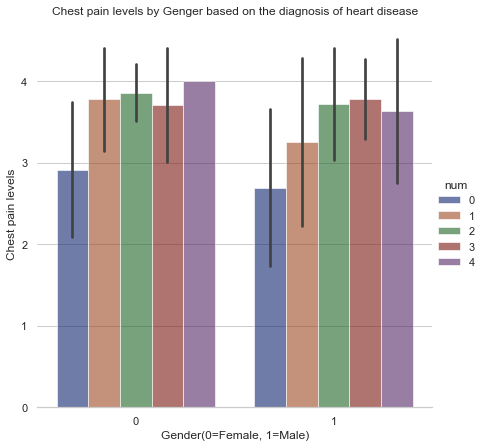

In [37]:
# Now, we will visualize all the attributes having different levels

sns.set_theme(style = 'whitegrid')

graph = sns.catplot( data = heart, kind='bar', x = "sex", y = "cp", hue = "num",
                       ci = 'sd', palette = "dark", alpha = .6, height = 6)

graph.despine(left=True)

graph.set_axis_labels('Gender(0=Female, 1=Male)', 'Chest pain levels')

plt.title("Chest pain levels by Genger based on the diagnosis of heart disease")

Based on the catplot we can say that both male and female patients with chest pain levels above 3, are more prone to get heart disease. Also, Female patients have highest diagnosis(4) of heart disease, who are having chest pain levels of 4. However, Male patients have less dianosis of heart disease compared to Female patients, when the chest pain levels are between 3 to 4. 

So based on this visualization we can say the Female patients are experiencing higher levels of chest pain, than male patients.

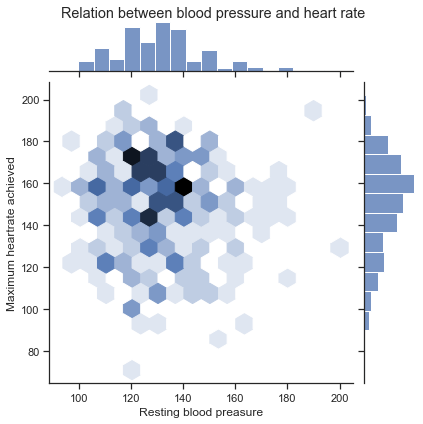

In [51]:
# Now we will plot the thalach and oldpeak

sns.set_theme(style = "ticks")
p = sns.jointplot(data = heart, y = "thalach", x = "trestbps", kind="hex")
p.set_axis_labels("Resting blood preasure", "Maximum heartrate achieved")
p.fig.suptitle("Relation between blood pressure and heart rate")
p.fig.subplots_adjust(top = 0.95)

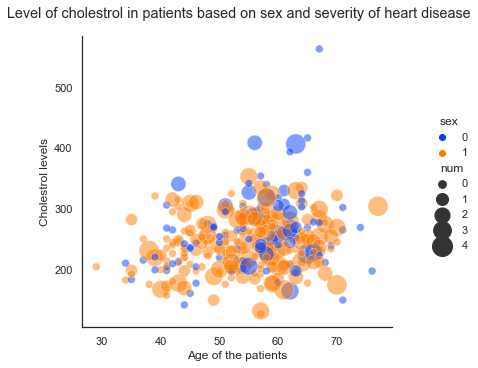

In [66]:
# Next we will determine the relation between the age and sex of the patient and 
# cholestrol levels. And how it contributes to the severity of the heart disease

sns.set_theme(style="white")
viz = sns.relplot(data = heart, x = "age", y = "chol", hue = "sex", size = 'num',
            sizes = (60,400), alpha = 0.5, palette = "bright")

viz.set_axis_labels("Age of the patients", "Cholestrol levels")
viz.fig.suptitle("Level of cholestrol in patients based on sex and severity of heart disease")
viz.fig.subplots_adjust(top = 0.90)

From the above scatter plot we can see that Male patients have higher colestrol levels as compared to Female patients. Also, Male patients have a higher risk of getting a heart disease.

**Now we will split the columns into categorical type and integer type and generate graphicla visualizations**

In [70]:
cat_col = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca','thal','fbs','num']
num_col = ['age', 'trestbps', 'chol','thalach','oldpeak']

D:\MYSOFTWARE\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\MYSOFTWARE\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\MYSOFTWARE\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\MYSOFTWARE\Anaconda\lib\site-packa

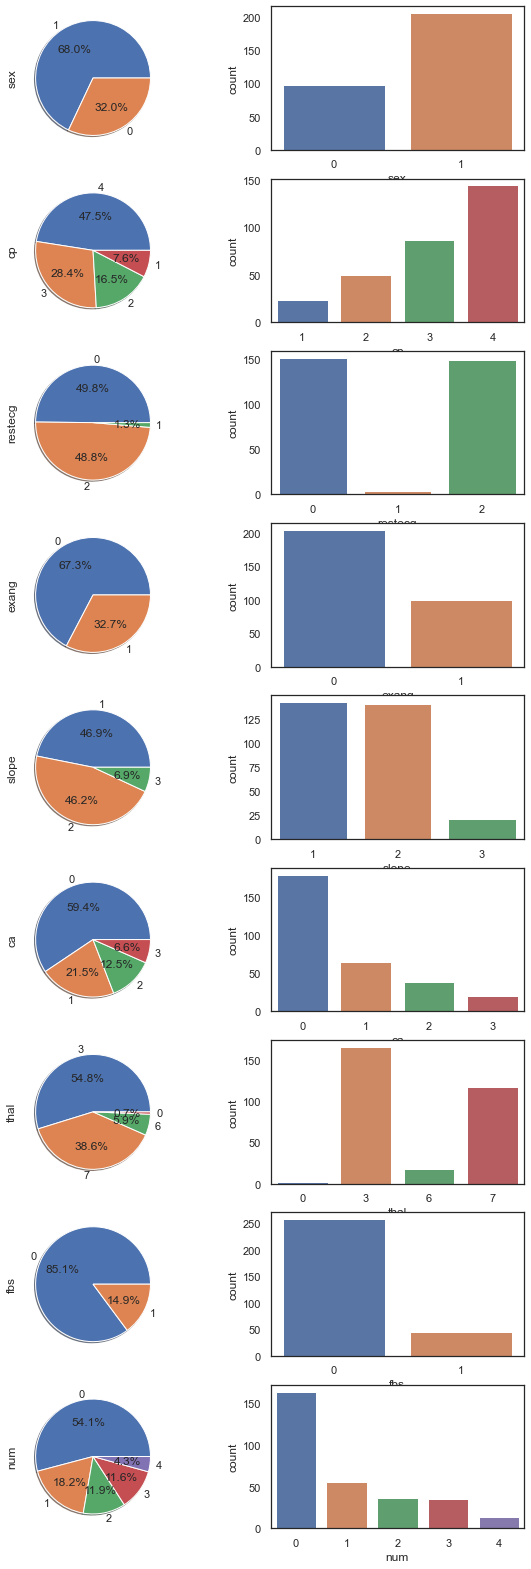

In [82]:
plt.figure(figsize=(10, 28))
count = 1
for cols in cat_col:
    plt.subplot(9, 2, count)
    heart[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    count +=1
    plt.subplot(9, 2, count)
    sns.countplot(cols, data=heart)
    count+=1

In [84]:
from collections import Counter

In [85]:
features = num_col

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        print("col", col)
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        print("Q1", Q1)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        print("Q3", Q3)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        print("IQR", IQR)
        # outlier step
        outlier_step = 1.5 * IQR
        print("outlier_step", outlier_step)
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    print("outlier_indices",outlier_indices)
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(heart[features]))))

col age
Q1 48.0
Q3 61.0
IQR 13.0
outlier_step 19.5
col trestbps
Q1 120.0
Q3 140.0
IQR 20.0
outlier_step 30.0
col chol
Q1 211.0
Q3 275.0
IQR 64.0
outlier_step 96.0
col thalach
Q1 133.5
Q3 166.0
IQR 32.5
outlier_step 48.75
col oldpeak
Q1 0.0
Q3 1.0
IQR 1.0
outlier_step 1.5
outlier_indices Counter({126: 2, 183: 2, 231: 2, 121: 2, 14: 1, 83: 1, 172: 1, 188: 1, 201: 1, 213: 1, 48: 1, 152: 1, 173: 1, 181: 1, 245: 1, 3: 1, 6: 1, 9: 1, 23: 1, 66: 1, 68: 1, 69: 1, 80: 1, 91: 1, 108: 1, 113: 1, 123: 1, 191: 1, 206: 1, 211: 1, 235: 1, 264: 1, 280: 1, 285: 1, 293: 1, 299: 1})
The dataset contains 0 observations with more than 2 outliers


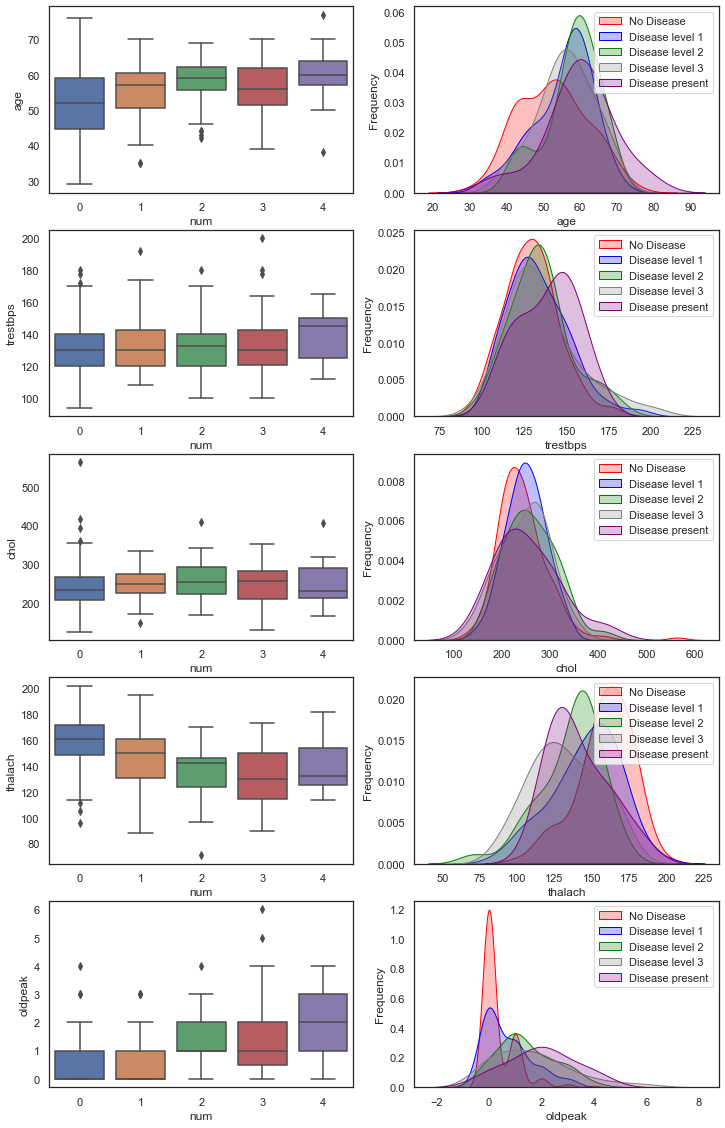

In [103]:
plt.figure(figsize=(12, 24))
count = 1
for cols in num_col:
    plt.subplot(6, 2, count)
    sns.boxplot(x='num', y= cols, data= heart)
    count +=1
    plt.subplot(6, 2, count)
    
    g = sns.kdeplot(heart[cols][(heart["num"] == 0) & (heart[cols].notnull())], color="Red", shade = True)
    g = sns.kdeplot(heart[cols][(heart["num"] == 1) & (heart[cols].notnull())], ax =g, color="Blue", shade= True)
    g = sns.kdeplot(heart[cols][(heart["num"] == 2) & (heart[cols].notnull())], ax =g, color="Green", shade= True)
    g = sns.kdeplot(heart[cols][(heart["num"] == 3) & (heart[cols].notnull())], ax =g, color="Grey", shade= True)
    g = sns.kdeplot(heart[cols][(heart["num"] == 4) & (heart[cols].notnull())], ax =g, color="Purple", shade= True)
    g.set_xlabel(cols)
    g.set_ylabel("Frequency")
    g.legend(["No Disease","Disease level 1", "Disease level 2", "Disease level 3",'Disease present'])
    #g.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)
    #plt.legend(bbox_to_anchor=(1,1), loc=2)
    count+=1

***

## Performing Classification tasks

### First we will perform Decision Tree Classification:

In [119]:
# importing library 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Next we will assign the x and y values that we will use in classification.

In [108]:
x = heart[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang',
           'oldpeak','slope','ca','thal']].values
x

array([[63,  1,  1, ...,  3,  0,  6],
       [67,  1,  4, ...,  2,  3,  3],
       [67,  1,  4, ...,  2,  2,  7],
       ...,
       [57,  1,  4, ...,  2,  1,  7],
       [57,  0,  2, ...,  2,  1,  3],
       [38,  1,  3, ...,  1,  0,  3]], dtype=int64)

In [111]:
y = heart[['num']].values
y[0:5]

array([[0],
       [2],
       [1],
       [0],
       [0]], dtype=int64)

Now we will split the data into training and test sets

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [126]:
print('Shape of x training set {}'.format(x_train.shape))
print('Shape of y training set {}'.format(y_train.shape))
print('Shape of x testing set {}'.format(x_test.shape))
print('Shape of y testing set {}'.format(y_test.shape))

Shape of x training set (242, 13)
Shape of y training set (242, 1)
Shape of x testing set (61, 13)
Shape of y testing set (61, 1)


***

### Modeling:

### Now we will do the modeling of the data, where the criteria to create the decision tree will be based on entropy, so that we can get see the information gain.

In [127]:
heart_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
heart_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [128]:
heart_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Model Prediction

In [129]:
predict_tree = heart_tree.predict(x_test)
print(predict_tree[0:5])
print(y_test[0:5])

[0 0 0 0 0]
[[2]
 [0]
 [0]
 [4]
 [1]]


### Model evaluation

In [130]:
print('Decision Tree Accuracy', metrics.accuracy_score(y_test, predict_tree))

Decision Tree Accuracy 0.47540983606557374


In [121]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import graphviz
%matplotlib inline

***

## K nearest neighbor (KNN)

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

<ipython-input-134-bbd289c8e9bb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [135]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 0, 0, 0, 2], dtype=int64)

### Accuracy evaluation

In [136]:
from sklearn import metrics
print("Train Accuracy:", metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("Test Accuracy:", metrics.accuracy_score(y_test, yhat))

Train Accuracy: 0.6611570247933884
Test Accuracy: 0.4918032786885246


In [137]:
k=6 
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat6 = neigh6.predict(x_test)
print("Train Accuracy:", metrics.accuracy_score(y_train, neigh6.predict(x_train)))
print("Test Accuracy:", metrics.accuracy_score(y_test, yhat6))

Train Accuracy: 0.5909090909090909
Test Accuracy: 0.47540983606557374


<ipython-input-137-d6f0216a881f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)


In [138]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

<ipython-input-138-03e7dbeb084d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-138-03e7dbeb084d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-138-03e7dbeb084d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-138-03e7dbeb084d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClass

array([0.40983607, 0.44262295, 0.42622951, 0.49180328, 0.45901639,
       0.47540984, 0.44262295, 0.45901639, 0.47540984])

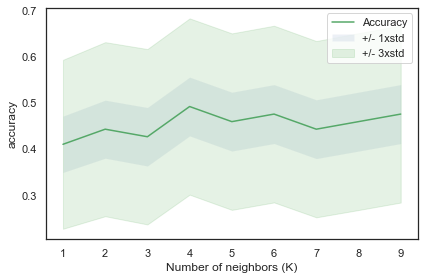

In [139]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, color = 'green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('accuracy')
plt.xlabel('Number of neighbors (K)')
plt.tight_layout()
plt.show()

In [140]:
print('best accuracy found with', mean_acc.max(), 'with k=', mean_acc.argmax()+1)

best accuracy found with 0.4918032786885246 with k= 4


***

## Logistic regression

### Generate the model for logistic regression

### Now, converting the x (independant variable) and y (target data) into array

In [146]:
x = np.asarray(heart[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang',
           'oldpeak','slope','ca','thal']])
x[0:5]

array([[ 63,   1,   1, 145, 233,   1,   2, 150,   0,   2,   3,   0,   6],
       [ 67,   1,   4, 160, 286,   0,   2, 108,   1,   1,   2,   3,   3],
       [ 67,   1,   4, 120, 229,   0,   2, 129,   1,   2,   2,   2,   7],
       [ 37,   1,   3, 130, 250,   0,   0, 187,   0,   3,   3,   0,   3],
       [ 41,   0,   2, 130, 204,   0,   2, 172,   0,   1,   1,   0,   3]],
      dtype=int64)

In [147]:
y = np.asarray(heart[['num']])
y[0:5]

array([[0],
       [2],
       [1],
       [0],
       [0]], dtype=int64)

### Performing train and test samples again with 20% test samples

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

D:\MYSOFTWARE\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.01, solver='liblinear')

In [150]:
yhat = LR.predict(x_test)
yhat

array([1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 3, 0, 0, 0, 0], dtype=int64)

In [151]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.15532126, 0.31815932, 0.24254032, 0.22578082, 0.05819828],
       [0.70211783, 0.13706946, 0.07482502, 0.04909595, 0.03689174],
       [0.64882384, 0.16487863, 0.09436618, 0.06002096, 0.03191038],
       [0.85540127, 0.09496988, 0.02405974, 0.01546971, 0.0100994 ],
       [0.25555681, 0.19139119, 0.2025047 , 0.26702496, 0.08352235],
       [0.28204547, 0.27334684, 0.15115299, 0.22719639, 0.06625831],
       [0.65643742, 0.13783804, 0.1066546 , 0.05752444, 0.0415455 ],
       [0.76982748, 0.11427173, 0.06742032, 0.02582931, 0.02265115],
       [0.68169917, 0.19956905, 0.05776411, 0.04578411, 0.01518357],
       [0.18466658, 0.25901828, 0.20812294, 0.26042697, 0.08776523],
       [0.80581237, 0.13043779, 0.01845379, 0.03456701, 0.01072904],
       [0.62304816, 0.18271177, 0.10032919, 0.05561703, 0.03829385],
       [0.63552422, 0.13468793, 0.12022725, 0.06541392, 0.04414668],
       [0.19624339, 0.34208165, 0.1722641 , 0.2374722 , 0.05193867],
       [0.794058  , 0.11322071, 0.

***

## Evaluation 

**We will evaluate this model based on three parameters Jaccard Index, Confusion Matrix and log loss**

### Jaccard Index

In [158]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,average='weighted')

0.3690085870413739

### confusion matrix

In [165]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normailzed confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                 horizontalalignment = 'center',
                 color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

print(confusion_matrix(y_test,yhat, labels=[4,3,2,1,0]))

[[ 0  2  0  0  1]
 [ 0  2  1  1  4]
 [ 0  3  1  1  2]
 [ 0  1  1  0  9]
 [ 0  0  1  0 31]]


Confusion matrix, without normalization
[[ 0  2  0  0  1]
 [ 0  2  1  1  4]
 [ 0  3  1  1  2]
 [ 0  1  1  0  9]
 [ 0  0  1  0 31]]


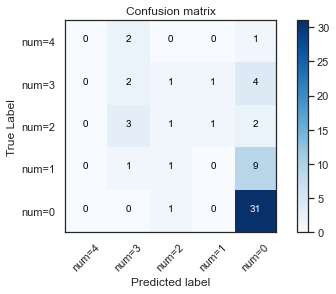

In [166]:
cnf_matrix = confusion_matrix(y_test, yhat, labels = [4,3,2,1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['num=4','num=3','num=2','num=1','num=0'],normalize=False, title='Confusion matrix')

In [167]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78        32
           1       0.00      0.00      0.00        11
           2       0.25      0.14      0.18         7
           3       0.25      0.25      0.25         8
           4       0.00      0.00      0.00         3

    accuracy                           0.56        61
   macro avg       0.23      0.27      0.24        61
weighted avg       0.41      0.56      0.47        61



D:\MYSOFTWARE\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***

### Log Loss

In [168]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

1.1156950705243476

In [170]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(x_train, y_train)
yhat_prob2 = LR2.predict_proba(x_test)
print("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

D:\MYSOFTWARE\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogLoss: : 1.14


D:\MYSOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
